In [1]:
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import numpy as np
import cmocean
import geopandas as gp
import cartopy.io.shapereader as shpreader

from unseen import fileio
from unseen import spatial_selection
from unseen import time_utils

## Map info

In [2]:
# CAFE grid

lat_bounds = np.array([-90.      , -88.988764, -86.966292, -84.94382 , -82.921348, -80.898876,
       -78.876404, -76.853933, -74.831461, -72.808989, -70.786517, -68.764045,
       -66.741573, -64.719101, -62.696629, -60.674157, -58.651685, -56.629213,
       -54.606742, -52.58427 , -50.561798, -48.539326, -46.516854, -44.494382,
       -42.47191 , -40.449438, -38.426966, -36.404494, -34.382022, -32.359551,
       -30.337079, -28.314607, -26.292135, -24.269663, -22.247191, -20.224719,
       -18.202247, -16.179775, -14.157303, -12.134831, -10.11236 ,  -8.089888,
        -6.067416,  -4.044944,  -2.022472,   0.      ,   2.022472,   4.044944,
         6.067416,   8.089888,  10.11236 ,  12.134831,  14.157303,  16.179775,
        18.202247,  20.224719,  22.247191,  24.269663,  26.292135,  28.314607,
        30.337079,  32.359551,  34.382022,  36.404494,  38.426966,  40.449438,
        42.47191 ,  44.494382,  46.516854,  48.539326,  50.561798,  52.58427 ,
        54.606742,  56.629213,  58.651685,  60.674157,  62.696629,  64.719101,
        66.741573,  68.764045,  70.786517,  72.808989,  74.831461,  76.853933,
        78.876404,  80.898876,  82.921348,  84.94382 ,  86.966292,  88.988764,
        90.      ])

lon_bounds = np.array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5, 360. ])

In [3]:
abs_drainage_divisions = gp.read_file('/g/data/xv83/dbi599/east-coast-rain/kx-australias-river-basins-1997-SHP.zip')
    #'shapefiles/ADD_2021_AUST_GDA2020_SHP.zip')

In [18]:
abs_drainage_divisions['BNUM'].astype(int) > 20

0        True
1        True
2       False
3        True
4       False
        ...  
1304     True
1305     True
1306     True
1307     True
1308    False
Name: BNUM, Length: 1309, dtype: bool

In [21]:
sec = abs_drainage_divisions[(abs_drainage_divisions['DNUM'] == 'II') & (abs_drainage_divisions['BNUM'].astype(int) < 21)]
sec

,AUS,AUS_ID,F_CODE,BNAME,BNUM,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X,geometry
134,1075.0,1107.0,dbasin_cent,WOLLONGONG COAST,14,SYDNEY,C,SOUTH-EAST COAST,II,-34.417415,150.873384,"POLYGON ((150.94650 -34.26570, 150.94840 -34.2..."
140,978.0,1002.0,dbasin_cent,RICHMOND RIVER,3,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-28.829297,153.088354,"POLYGON ((153.10684 -28.35850, 153.10760 -28.3..."
142,1001.0,1034.0,dbasin_cent,HASTINGS RIVER,7,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-31.405976,152.532930,"POLYGON ((152.73519 -31.81266, 152.73050 -31.8..."
143,1002.0,1035.0,dbasin_cent,MANNING RIVER,8,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-31.742574,151.898200,"POLYGON ((151.15560 -31.63000, 151.16080 -31.6..."
149,1047.0,1079.0,dbasin_cent,SYDNEY COAST-GEORGES RIVER,13,SYDNEY,C,SOUTH-EAST COAST,II,-33.945151,151.017672,"POLYGON ((151.31184 -33.68214, 151.31056 -33.6..."
159,1130.0,1162.0,dbasin_cent,MORUYA RIVER,17,SNOWY-SHOALHAVEN,D,SOUTH-EAST COAST,II,-35.847003,149.860758,"POLYGON ((149.67140 -35.99000, 149.67530 -35.9..."
192,1145.0,1177.0,dbasin_cent,TOWAMBA RIVER,20,SNOWY-SHOALHAVEN,D,SOUTH-EAST COAST,II,-37.087069,149.728496,"POLYGON ((149.97527 -37.50684, 149.97460 -37.5..."
207,997.0,1029.0,dbasin_cent,MACLEAY RIVER,6,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-30.811435,152.094018,"POLYGON ((151.39620 -30.83830, 151.40290 -30.8..."
247,1033.0,1065.0,dbasin_cent,MACQUARIE-TUGGERAH LAKES,11,HUNTER,B,SOUTH-EAST COAST,II,-33.151200,151.452538,"POLYGON ((151.47567 -33.40887, 151.47220 -33.4..."
252,975.0,999.0,dbasin_cent,CLARENCE RIVER,4,COFFS HARBOUR,A,SOUTH-EAST COAST,II,-29.517220,152.496640,"POLYGON ((151.66960 -30.02420, 151.66890 -30.0..."


<AxesSubplot:>

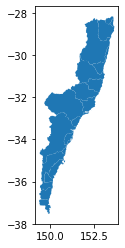

In [22]:
sec.plot()

In [25]:
nec = abs_drainage_divisions[(abs_drainage_divisions['DNUM'] == 'I') & (abs_drainage_divisions['BNUM'].astype(int) > 36)]
nec

,AUS,AUS_ID,F_CODE,BNAME,BNUM,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X,geometry
60,876.0,885.0,island_cent,NOOSA RIVER,40,MARY,I,NORTH-EAST COAST,I,-25.552874,152.908294,"POLYGON ((152.90884 -25.55663, 152.90611 -25.5..."
82,855.0,875.0,dbasin_cent,BURRUM RIVER,37,BURNETT,H,NORTH-EAST COAST,I,-25.247105,152.387593,"POLYGON ((152.39909 -24.76158, 152.39987 -24.7..."
111,909.0,931.0,dbasin_cent,MAROOCHY RIVER,41,MARY,I,NORTH-EAST COAST,I,-26.754048,152.995269,"POLYGON ((153.07767 -27.10470, 153.07709 -27.1..."
122,910.0,932.0,dbasin_cent,BRISBANE RIVER,43,BRISBANE,J,NORTH-EAST COAST,I,-27.308991,152.399606,"POLYGON ((152.19580 -27.92850, 152.19290 -27.9..."
125,853.0,872.0,dbasin_cent,FRASER ISLAND,39,MARY,I,NORTH-EAST COAST,I,-25.261417,153.141697,"POLYGON ((152.98278 -25.67499, 152.98015 -25.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,968.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.862005,153.400748,"POLYGON ((153.40242 -27.86473, 153.40199 -27.8..."
1115,969.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.875513,153.403628,"POLYGON ((153.40258 -27.86972, 153.40479 -27.8..."
1116,970.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.877579,153.416939,"POLYGON ((153.41664 -27.88375, 153.41621 -27.8..."
1117,971.0,971.0,island_cent,SOUTH COAST,46,GOLD COAST,K,NORTH-EAST COAST,I,-27.888612,153.401180,"POLYGON ((153.40198 -27.89110, 153.40118 -27.8..."


<AxesSubplot:>

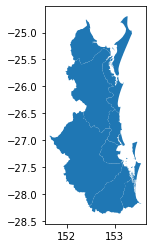

In [26]:
nec.plot()